### Day 12 Exercise

#### Problem Statement:

A company wants to maximize its profit defined by:

Profit: 4x + 7y

Subject to:  

3x + 4y ≤ 18  
2x + y ≤ 8  
x, y ≥ 0

Instructions:

Convert the maximization problem into a minimization problem by minimizing -4x - 7y.

Solve the LP using SciPy's linprog.

Report:

(a) The optimal solution (values of x and y) and the corresponding maximum profit.

Perform sensitivity analysis:

Adjust the RHS of the first constraint from 18 to 20.

(b) Report the new optimal solution and new maximum profit.

Calculate the change in profit per unit change in the RHS of the first constraint.

(c) What does this value indicate about the dual variable (shadow price) for the first constraint?

In [33]:
import numpy as np

from scipy.optimize import linprog

In [34]:
# Define the problem

c = [-4, -7]

A = [
    [3, 4],
    [2,1]
]

b = [18, 8]

bounds = [(0,None), (0,None)]

In [35]:
result = linprog(
    c = c,
    A_ub = A,
    b_ub = b,
    bounds = bounds,
    method="highs"
)

print("Optimal result found at:", result.x)
print("Maximized profit found:", result.fun*-1 )


Optimal result found at: [0.  4.5]
Maximized profit found: 31.5


In [38]:
x = 0

c = [-4, -7]

A = [
    [3, 4],
    [2,1]
]

b = [x, 8]

bounds = [(0,None), (0,None)] 

for x in range(0, 30):
    result = linprog(
        c = c,
        A_ub = A,
        b_ub = [x, 8],
        bounds = bounds,
        method="highs"
    )
    print("Maximized profit found:", result.fun*-1 )

for x in range(0, 30):
    result = linprog(
        c = c,
        A_ub = A,
        b_ub = [18, x],
        bounds = bounds,
        method="highs"
    )
    print("For value x=",x, "the maximized profit found:", result.fun*-1 )


For value x= 0 the maximized profit found: -0.0
For value x= 1 the maximized profit found: 7.0
For value x= 2 the maximized profit found: 14.0
For value x= 3 the maximized profit found: 21.0
For value x= 4 the maximized profit found: 28.0
For value x= 5 the maximized profit found: 31.5
For value x= 6 the maximized profit found: 31.5
For value x= 7 the maximized profit found: 31.5
For value x= 8 the maximized profit found: 31.5
For value x= 9 the maximized profit found: 31.5
For value x= 10 the maximized profit found: 31.5
For value x= 11 the maximized profit found: 31.5
For value x= 12 the maximized profit found: 31.5
For value x= 13 the maximized profit found: 31.5
For value x= 14 the maximized profit found: 31.5
For value x= 15 the maximized profit found: 31.5
For value x= 16 the maximized profit found: 31.5
For value x= 17 the maximized profit found: 31.5
For value x= 18 the maximized profit found: 31.5
For value x= 19 the maximized profit found: 31.5
For value x= 20 the maximized p

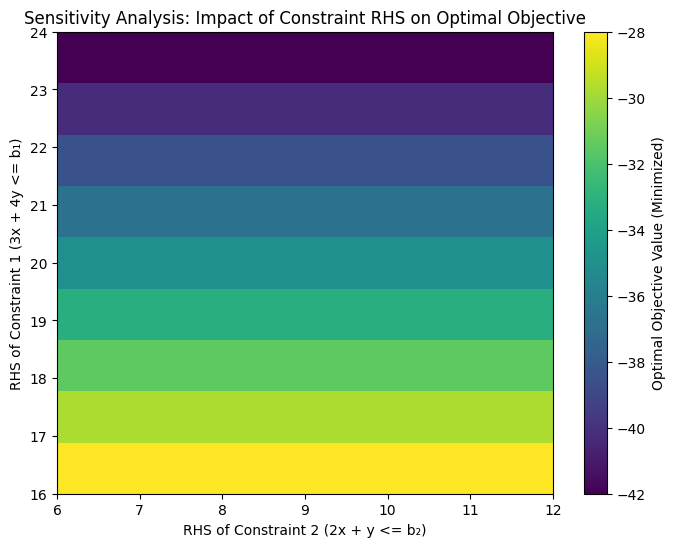

In [40]:
# Visualize the problem

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import linprog

# Define the LP problem parameters
c = [-4, -7]          # Objective: minimize -4x - 7y (i.e., maximize 4x+7y)
A = [[3, 4],          # Constraint 1: 3x + 4y <= b1
     [2, 1]]          # Constraint 2: 2x + y  <= b2
# Original RHS values: b1 = 18, b2 = 8
bounds = [(0, None), (0, None)]

# Define ranges for the RHS values for sensitivity analysis:
# For constraint 1 (3x+4y <= b1), let b1 vary from 16 to 24.
# For constraint 2 (2x+y <= b2), let b2 vary from 6 to 12.
b1_range = np.arange(16, 25, 1)
b2_range = np.arange(6, 13, 1)

# Create a grid to store the optimal objective values
objective_grid = np.zeros((len(b1_range), len(b2_range)))

# Loop over each combination of b1 and b2, solve the LP, and store the minimized objective value.
for i, b1 in enumerate(b1_range):
    for j, b2 in enumerate(b2_range):
        res = linprog(c=c, A_ub=A, b_ub=[b1, b2], bounds=bounds, method="highs")
        objective_grid[i, j] = res.fun

# Create a heatmap:
plt.figure(figsize=(8, 6))
# Use 'extent' to label axes with the corresponding b2 and b1 ranges.
extent = [b2_range[0], b2_range[-1], b1_range[0], b1_range[-1]]
im = plt.imshow(objective_grid, origin='lower', extent=extent, aspect='auto', cmap='viridis')
plt.colorbar(im, label='Optimal Objective Value (Minimized)')
plt.xlabel('RHS of Constraint 2 (2x + y <= b₂)')
plt.ylabel('RHS of Constraint 1 (3x + 4y <= b₁)')
plt.title('Sensitivity Analysis: Impact of Constraint RHS on Optimal Objective')

plt.show()
